### Diabetics Prediction Using Random Forest Algotrithm

In [231]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
%matplotlib inline

In [232]:

# Loading data
df=pd.read_csv('/content/drive/MyDrive/ML Dataset/diabetes2.csv')


In [233]:
df_temp = df.copy()

In [234]:
# Viewing First Five rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [236]:
df.shape

(768, 9)

In [237]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [238]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

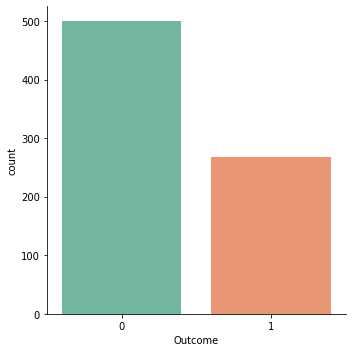

In [239]:
# Visualizing outcome
sns.catplot(x="Outcome", kind="count", data=df_temp, palette="Set2")
plt.show()

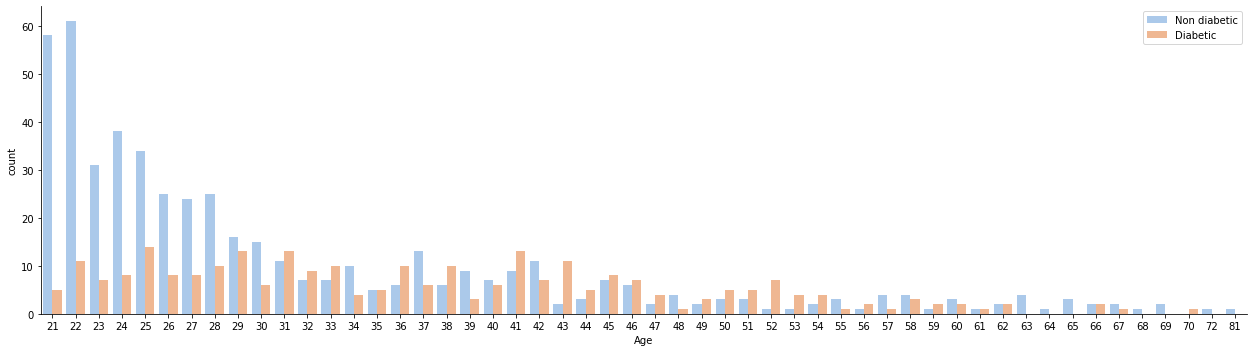

In [240]:
# Visualizing Number of Diabetics and Non Diabetics patient of different age group
ax = sns.catplot(x="Age", kind="count",hue="Outcome",data=df_temp, palette="pastel", legend=False)
ax.fig.set_figwidth(20)
plt.legend(loc='upper right', labels= ["Non diabetic", "Diabetic"])
plt.show()

In [241]:
# Age Distribution
fig = px.histogram(df, x="Age",
                   marginal="box")
fig.show()

In [242]:
# Age Distribution for outcome 0
fig = px.histogram(df, x=df[df.Outcome==0].Age,
                   marginal="box",
                   color_discrete_sequence=['lightgreen'])
fig.show()

In [243]:
# Age Distribution for outcome 1 
fig = px.histogram(df, x=df[df.Outcome==1].Age,
                   marginal="box",
                   color_discrete_sequence=['purple'])
fig.show()

In [244]:
# Glucose Distribution for outcome 1
fig = px.histogram(df, x=df[df.Outcome==1].Glucose,
                   marginal="box",
                   color_discrete_sequence=['#AB63FA'])
fig.show()

In [245]:
# Average Glucose for Diabetics Patient
df[df.Outcome==1].Glucose.mean()

141.25746268656715

In [246]:
x = df_temp.drop(['Outcome'], axis = 1)
y = df_temp.loc[:,"Outcome"].values

In [247]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 123)

In [248]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(514, 8)
(514,)
(254, 8)
(254,)


In [249]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train, y_train)

RandomForestClassifier()

In [250]:
x_pred = clf.predict(x_train)

In [251]:
confusion_matrix(y_train, x_pred)

array([[343,   0],
       [  0, 171]])

In [252]:
score = accuracy_score(y_train, x_pred)
score

1.0

In [253]:
y_pred = clf.predict(x_test)

In [254]:
confusion_matrix(y_pred,y_test)

array([[131,  31],
       [ 26,  66]])

In [255]:
score = accuracy_score(y_pred, y_test)
score

0.7755905511811023

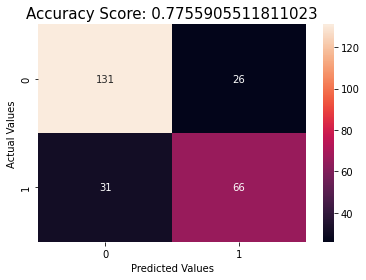

In [256]:
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [257]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       157
           1       0.72      0.68      0.70        97

    accuracy                           0.78       254
   macro avg       0.76      0.76      0.76       254
weighted avg       0.77      0.78      0.77       254



In [258]:
# Testing Model
# Defined Diabetic data set
data = [[5, 150, 33.7, 50, 150, 74, 0.5, 53]]

# Create the pandas DataFrame 
df_test = pd.DataFrame(data, columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

# Predict on new data
res = clf.predict(df_test)
res

array([1])